<a href="https://colab.research.google.com/github/tomek-l/fire/blob/master/Binary_classifier_for_fire_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Augumentation vs no augumentation
We will try training a binary classifier with and without data augumentation. Thus, we'll test the hypothesis that data augumentation prevents/delays overfitting.

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
keras.__version__

'2.2.4-tf'

In [2]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
IMAGE_DIR = '/content/gdrive/My Drive/FireVideo/dry_creek/'
image_paths = [IMAGE_DIR+fname for fname in os.listdir(IMAGE_DIR)]



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#Create and compile model

In [3]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

W0620 18:13:38.079023 140694909851520 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0620 18:13:38.280523 140694909851520 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255 (to 0-1 range)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        '/content/gdrive/My Drive/FireVideo/binary_dataset/train',
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=16,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/gdrive/My Drive/FireVideo/binary_dataset/validation',
        target_size=(150, 150),
        batch_size=16,
        class_mode='binary')

Found 1826 images belonging to 2 classes.
Found 191 images belonging to 2 classes.


In [5]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/50
100/100 [==============================] - 103s 1s/step - loss: 0.5460 - acc: 0.7156 - val_loss: 0.3430 - val_acc: 0.8568
Epoch 2/50
100/100 [==============================] - 93s 934ms/step - loss: 0.3764 - acc: 0.8329 - val_loss: 0.3184 - val_acc: 0.8807
Epoch 3/50
100/100 [==============================] - 94s 938ms/step - loss: 0.3238 - acc: 0.8719 - val_loss: 0.2720 - val_acc: 0.8807
Epoch 4/50
100/100 [==============================] - 93s 930ms/step - loss: 0.2979 - acc: 0.8834 - val_loss: 0.2579 - val_acc: 0.8894
Epoch 5/50
100/100 [==============================] - 91s 911ms/step - loss: 0.2759 - acc: 0.8868 - val_loss: 0.3091 - val_acc: 0.8693
Epoch 6/50
100/100 [==============================] - 93s 927ms/step - loss: 0.2459 - acc: 0.9006 - val_loss: 0.2860 - val_acc: 0.8769
Epoch 7/50
100/100 [==============================] - 91s 906ms/step - loss: 0.2324 - acc: 0.9084 - val_loss: 0.2454 - val_acc: 0.8957
Epoch 8/50
100/100 [==============================] - 90s

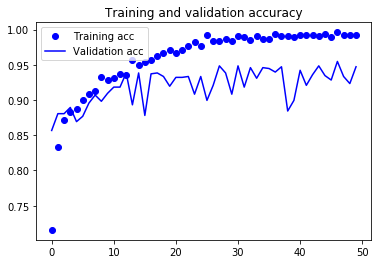

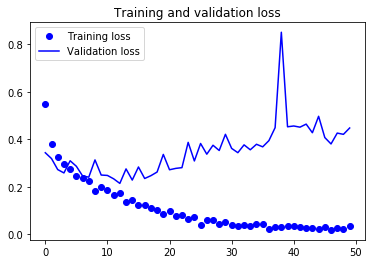

In [6]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### We can see that around 10th epoch the models starts to overfit

# Now let's try with data augumentation

In [7]:
augumented_train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

validation_generator = test_datagen.flow_from_directory(
        directory = '/content/gdrive/My Drive/FireVideo/binary_dataset/validation',
        target_size=(150, 150),
        batch_size=16,
        class_mode='binary')


aug_train_generator = augumented_train_datagen.flow_from_directory(
        # This is the target directory
        '/content/gdrive/My Drive/FireVideo/binary_dataset/train',
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=16,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 191 images belonging to 2 classes.
Found 1826 images belonging to 2 classes.


In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [9]:
history = model.fit_generator(
      aug_train_generator,
      steps_per_epoch=100,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=50)

model.save('binary_model_augumented_50epochs.h5')

Epoch 1/50
100/100 [==============================] - 64s 643ms/step - loss: 0.6313 - acc: 0.6425 - val_loss: 0.6988 - val_acc: 0.6394
Epoch 2/50
100/100 [==============================] - 60s 596ms/step - loss: 0.4710 - acc: 0.7700 - val_loss: 0.3651 - val_acc: 0.7952
Epoch 3/50
100/100 [==============================] - 59s 594ms/step - loss: 0.4309 - acc: 0.8009 - val_loss: 0.4161 - val_acc: 0.8003
Epoch 4/50
100/100 [==============================] - 60s 599ms/step - loss: 0.4107 - acc: 0.8019 - val_loss: 0.3017 - val_acc: 0.8794
Epoch 5/50
100/100 [==============================] - 59s 593ms/step - loss: 0.3985 - acc: 0.8159 - val_loss: 0.2911 - val_acc: 0.8781
Epoch 6/50
100/100 [==============================] - 60s 597ms/step - loss: 0.3729 - acc: 0.8391 - val_loss: 0.2647 - val_acc: 0.8920
Epoch 7/50
100/100 [==============================] - 60s 597ms/step - loss: 0.3669 - acc: 0.8356 - val_loss: 0.2738 - val_acc: 0.8995
Epoch 8/50
100/100 [==============================] - 5

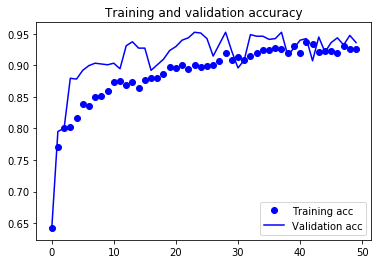

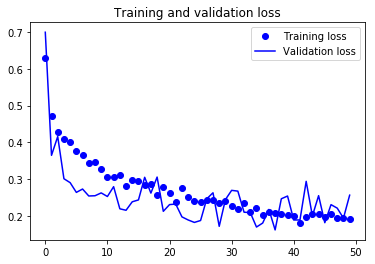

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

That's super odd... The validation accuracy is greater than training set accuracy.